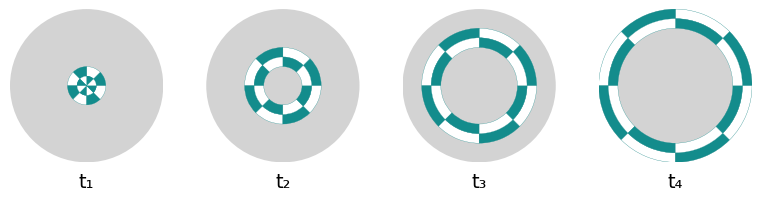

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle

def draw_ring(ax, inner, outer, n_seg=12, phase=0, color='#138C8C'):
    th = np.linspace(0, 360, n_seg+1) + phase
    for i in range(n_seg):
        fc = color if i % 2 == 0 else 'white'
        ec = color 
        ax.add_patch(
            Wedge((0,0), outer, th[i], th[i+1],
                  width=outer-inner, facecolor=fc,
                  edgecolor=ec, linewidth=.2))
        
fig, axes = plt.subplots(1, 4, figsize=(8,2), subplot_kw={'aspect':'equal'})
radii = [(0, .20), (.30, .40), (.50, .60), (.70, .80)]
labels = ['t₁', 't₂', 't₃', 't₄']
for ax, (r0, r1), label in zip(axes, radii, labels):
    bg = Circle((0, 0), radius=.8, facecolor='lightgray', edgecolor='none')
    ax.add_patch(bg)
    draw_ring(ax, r0, r1, n_seg=8)
    draw_ring(ax, r0-.1, r1-.1, n_seg=8, phase=45)
    ax.text(0, -1, label, fontsize=14, ha='center', va='center')
    ax.set_xlim(-.8,.8); ax.set_ylim(-.8,.8)
    ax.axis('off')

plt.tight_layout()
plt.savefig('visaul_stimuli.png', dpi=460, transparent=True)
plt.show()

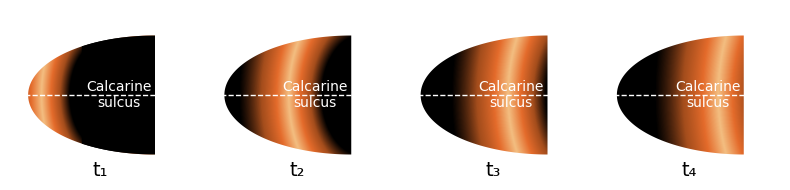

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch, Wedge
from matplotlib.path import Path
from matplotlib.colors import LinearSegmentedColormap

def make_left_half_ellipse_clip(ax, x0=0.8, y0=0.5, width=1.4, height=0.7):
    theta = np.linspace(90, 270, 300)
    x = x0 + (width / 2) * np.cos(np.radians(theta))
    y = y0 + (height / 2) * np.sin(np.radians(theta))
    verts = np.vstack(([x[0], y[0]], np.column_stack([x, y]), [x[-1], y[-1]], [x[0], y[0]])).T
    codes = [Path.MOVETO] + [Path.LINETO] * len(x) + [Path.LINETO, Path.CLOSEPOLY]
    return PathPatch(Path(verts.T, codes), transform=ax.transData)
    
def arc_stimulus(n=400, center=(0.45, 0), sigma_x=0.6, sigma_y=1.0):
    x = np.linspace(-1.1, 1.1, n)
    y = np.linspace(-1.1, 1.1, n)
    X, Y = np.meshgrid(x, y)
    
    cx, cy = center
    A = np.exp(- ((X - cx)**2 / (2 * sigma_x**2) + (Y - cy)**2 / (2 * sigma_y**2)))
    A *= (X < 0.9) * (X**2 + (Y * 0.1)**2 < 1.0)
    return A

# colormap
colors = ['#000000', '#a44d1c', '#e46b2b', '#f3be81', '#e46b2b', '#a44d1c', '#000000', '#000000', '#000000']
cmap = LinearSegmentedColormap.from_list('orange_black', colors)
cmap.set_under('#000000')

centers = [(0.05, 0), (0.8, 0), (1.2, 0), (1.5, 0)]
s_x=[0.6, 0.7, 0.8, 0.9]
s_y=[1, 1.1, 1.3, 1.5]
labels = ['t₁', 't₂', 't₃', 't₄']

fig, axes = plt.subplots(1, 4, figsize=(8, 2))

for i, (ax, cx, sx, sy, label) in enumerate(zip(axes, centers, s_x, s_y, labels)):
    img = arc_stimulus(center=cx, sigma_x=sx, sigma_y=sy)
    im = ax.imshow(img, cmap=cmap, vmin=0.1, vmax=1.0,
               extent=[0, 1.0, 0, 1], origin='lower', aspect='auto')

    clip = make_left_half_ellipse_clip(ax)
    im.set_clip_path(clip)
    if i == 0:
        mask = ax.fill_betweenx(y=[0, 1], x1=0.4, x2=1.0, color='black', zorder=1)
        mask.set_clip_path(make_left_half_ellipse_clip(ax))

    # calcarine sulcus
    ax.plot([0, 1], [0.5, 0.5], ls='--', lw=1.0, color='white')

    ax.text(0.6, 0.5, 'Calcarine\nsulcus', color='white', fontsize=10,
        ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 0, label, ha='center', va='bottom', transform=ax.transAxes, fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

plt.tight_layout()
plt.savefig("activation_pattern.png", dpi=460, transparent=True)
plt.show()